In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [16]:
df = pd.read_csv('titanic/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
#droping unecessary columns in terms of analysis
df.drop(columns = ['Name', 'Ticket', 'PassengerId', 'Cabin'], inplace= True)

In [18]:
#dropping null values
df.dropna(inplace= True)
df.shape

(712, 8)

In [19]:
#summary statistics
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


# Explanatory Data Analysis 

## Q1: Was people from the first class more likely to survive ?

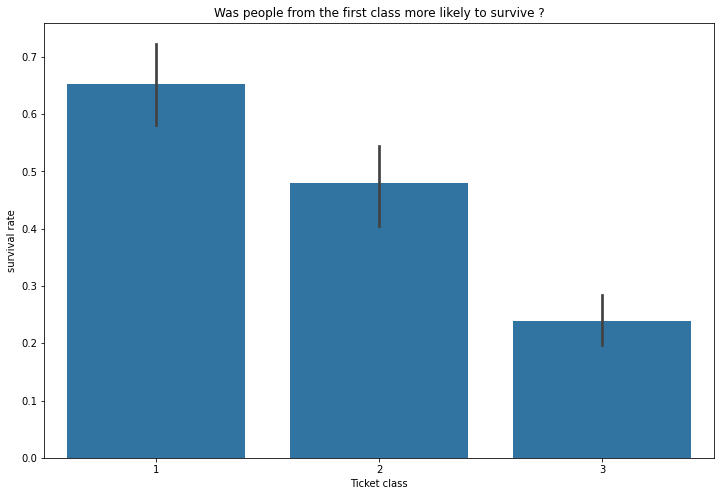

In [20]:
plt.figure(figsize = [12, 8])
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'Pclass', y = 'Survived', color = base_color)
plt.xlabel('Ticket class')
plt.ylabel('survival rate')
plt.title('Was people from the first class more likely to survive ?');

#### People from first class were more likely to survive than people from second class, and people from second class were more likely to survive than people from the third class

## Q2: Was survival rate bigger with females than males?

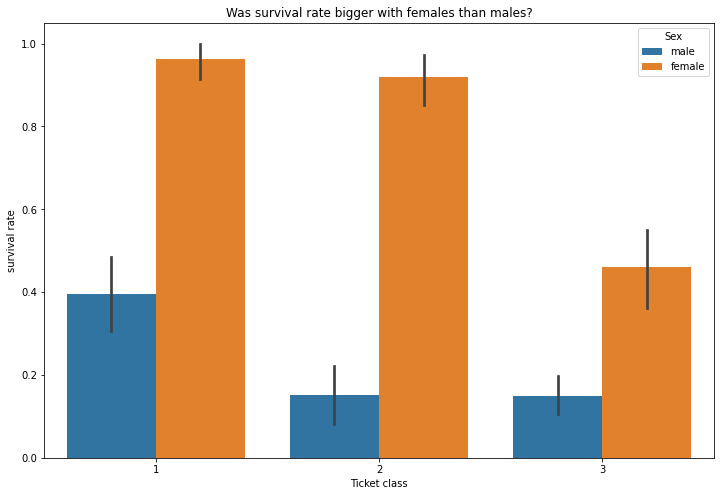

In [21]:
plt.figure(figsize = [12, 8])
sb.barplot(data = df, x = 'Pclass', y = 'Survived', hue = 'Sex')
plt.xlabel('Ticket class')
plt.ylabel('survival rate')
plt.title('Was survival rate bigger with females than males?');

#### Insights
 - Survival rate was bigger with females than males
 - men with first class tickets were more likely to survive than other men
 - women with third class tickets had a small survival rate

## Q3: Was young people more likely to survive?

In [22]:
#creating age groups
category = pd.cut(df.Age, bins = [0, 14, 24, 65, 115], labels=['childrens', 'youth', 'adults', 'seniors'])
df.insert(5, 'age_group', category)

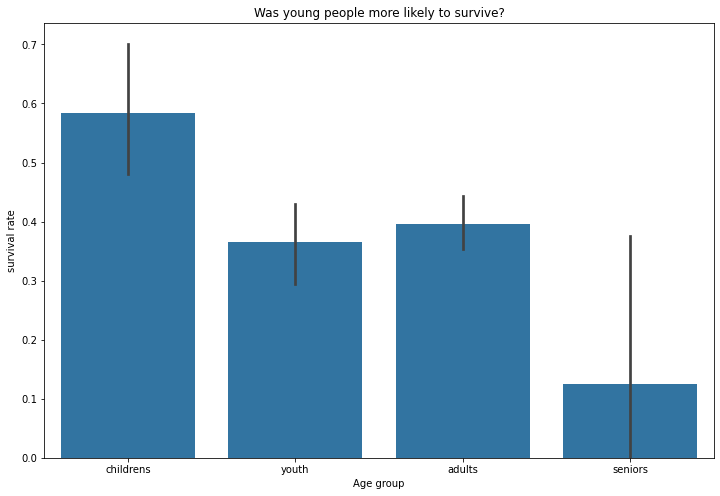

In [23]:
plt.figure(figsize = [12, 8])
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'age_group', y = 'Survived', color = base_color)
plt.xlabel('Age group')
plt.ylabel('survival rate')
plt.title('Was young people more likely to survive?');

#### Childrens were more likely to survive

## Q4: did the number of siblings affect the survival rate?

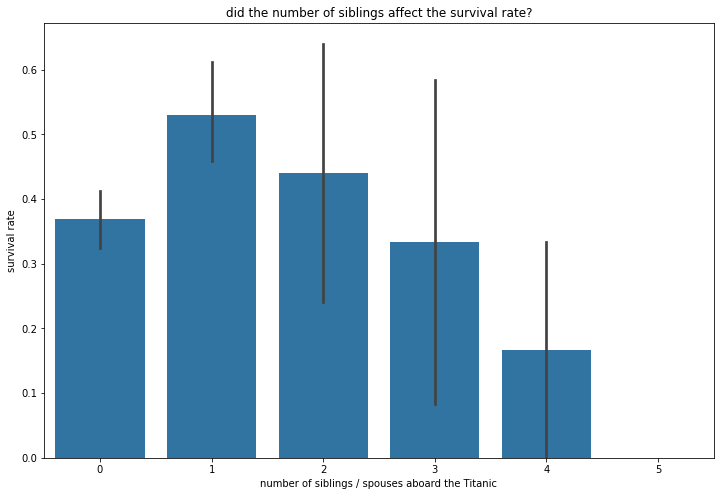

In [24]:
plt.figure(figsize = [12, 8])
sb.barplot(data = df, x = 'SibSp', y = 'Survived', color = base_color)
plt.xlabel('number of siblings / spouses aboard the Titanic')
plt.ylabel('survival rate')
plt.title('did the number of siblings affect the survival rate?');

#### Yes, number of siblings affect the survival rate, passengers with 1 sibling were more likely to survive

## Q5: Did the number of parents / children affect the survival rate?

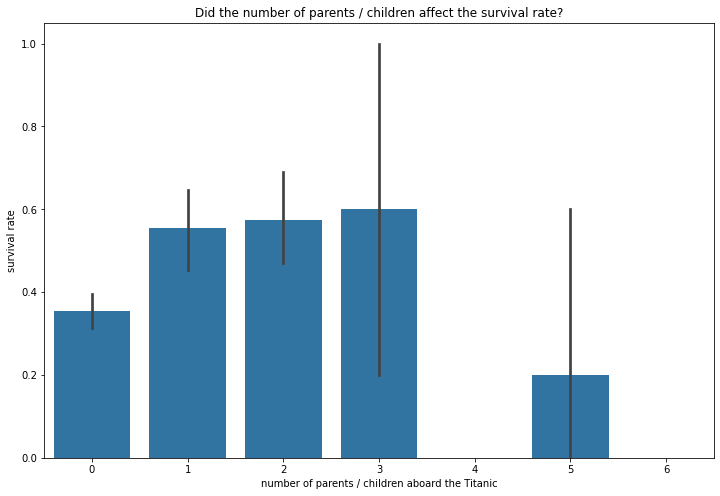

In [25]:
plt.figure(figsize = [12, 8])
sb.barplot(data = df, x = 'Parch', y = 'Survived', color = base_color)
plt.xlabel('number of parents / children aboard the Titanic')
plt.ylabel('survival rate')
plt.title('Did the number of parents / children affect the survival rate?');

#### yes, number of parents / children affect the survival rate, passengers with number of parents / childrens equal to 3 were more likely to survive

## Q6: Did the port of embarkation affect the survival rate?

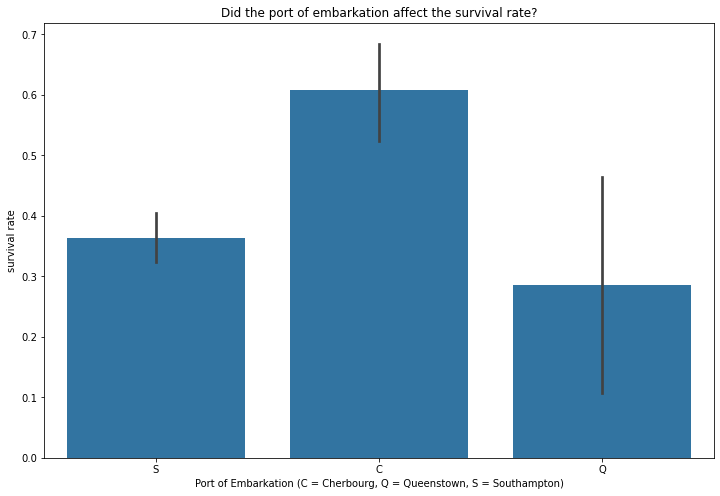

In [26]:
plt.figure(figsize = [12, 8])
sb.barplot(data = df, x = 'Embarked', y = 'Survived', color = base_color)
plt.xlabel('Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.ylabel('survival rate')
plt.title('Did the port of embarkation affect the survival rate?');

#### People who embarked from Cherbourg were more likely to survive, but this doesn't mean that this was a reason (correlation doesn't imply causation)